In [1]:
import pandas as pd
data = pd.read_csv('final_ml_data_set.csv', low_memory=False)
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,Amoena,N,N,N,N,N,Y,N,N,F/B
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,Amoena,N,N,N,N,N,Y,N,N,F/B
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B


In [2]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("\'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace('"',''))
    return (12*ft_) + in_

In [3]:
data["Ht (inches)"] = data["Height (ft-in)"].apply(lambda x:parse_ht(x))

In [4]:
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Ht (inches)
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,N,N,Y,N,N,F/B,60.0
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,N,N,Y,N,N,F/B,60.0
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0


In [5]:
def band_size(size):
    band = int(size[0:2])
    return band

def cup_size(size):
    cup = size[2:]
    return cup

In [6]:
data["Band Size"] = data["Bra Size"].apply(lambda x:band_size(x))
data["Cup Size"] = data["Bra Size"].apply(lambda x:cup_size(x))

In [7]:
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Ht (inches),Band Size,Cup Size
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,Y,N,N,F/B,60.0,32,A
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,Y,N,N,F/B,60.0,32,A
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A


In [8]:
list(data.columns)

['Age',
 'Height (ft-in)',
 'Weight (lb)',
 'Shoulder Pain',
 'R/L/B/P',
 'Bra Color',
 'Bra Size',
 'Embroidery',
 'Jacquard Fabric',
 'Bra Style',
 'Difficulty Reaching Back',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Ht (inches)',
 'Band Size',
 'Cup Size']

In [9]:
new_df = data[['Age',
 'Weight (lb)',
 'Ht (inches)',
 'Band Size',
 'Cup Size',
 'R/L/B/P',
 'Shoulder Pain',
 'Bra Color',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Difficulty Reaching Back',
 'Embroidery',
 'Jacquard Fabric',               
 'Bra Style']]

In [10]:
new_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,77,100,60.0,32,A,R,N,nude,Amoena,N,...,N,N,Y,N,N,F/B,Y,N,Y,Ellen
1,78,100,60.0,32,A,R,N,nude,Amoena,N,...,N,N,Y,N,N,F/B,Y,N,Y,Ellen
2,78,100,58.0,32,A,L,Y,nude,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara
3,78,100,58.0,32,A,L,Y,nude,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara
4,78,100,58.0,32,A,L,Y,black,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara


In [11]:
len(new_df.columns)

22

In [12]:
# import 
import numpy as np
import pandas as pd

X = new_df.select_dtypes(include=[object])
X.head(3)

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,A,R,N,nude,Amoena,N,N,N,N,N,Y,N,N,F/B,Y,N,Y,Ellen
1,A,R,N,nude,Amoena,N,N,N,N,N,Y,N,N,F/B,Y,N,Y,Ellen
2,A,L,Y,nude,Amoena,N,N,N,Y,Y,N,N,N,B,N,N,N,Lara


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_2 = X.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
X_2.head()

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,0,4,0,5,1,0,0,0,0,0,1,0,0,2,1,0,1,21
1,0,4,0,5,1,0,0,0,0,0,1,0,0,2,1,0,1,21
2,0,1,1,5,1,0,0,0,1,1,0,0,0,0,0,0,0,37
3,0,1,1,5,1,0,0,0,1,1,0,0,0,0,0,0,0,37
4,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,37


In [14]:
int_df = new_df[["Age", "Weight (lb)", "Ht (inches)", "Band Size"]]
int_df.head()

,Age,Weight (lb),Ht (inches),Band Size
0,77,100,60.0,32
1,78,100,60.0,32
2,78,100,58.0,32
3,78,100,58.0,32
4,78,100,58.0,32


In [15]:
encoded_df = int_df.join(X_2)

encoded_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
2,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
3,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
4,78,100,58.0,32,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,37


In [17]:
dataset = encoded_df.values
X = dataset[:,0:21].astype(float)
y = dataset[:, 21]

In [21]:
from sklearn import model_selection
from sklearn import svm

In [22]:
# Now using scikit-learn model_selection module, split the iris data into train/test data sets

# keeping 40% reserved for testing purpose and 60% data will be used to train and form model.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, y, test_size=0.4, random_state=0)

In [24]:
# Build an SVC (Support Vector Classification) model using linear regression
clf_ob = svm.SVC(kernel="linear", C=1).fit(X_train, Y_train)

In [25]:
print(clf_ob.score(X_test, Y_test))

0.84


In [26]:
# Further, let’s now validate robustness of above model using K-Fold Cross validation technique

# We give cross_val_score a model, the entire iris data set and its real values, and the number of folds:

scores_res = model_selection.cross_val_score(clf_ob, X, y, cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(scores_res)

# And the mean accuracy of all 5 folds.
print(scores_res.mean())

C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.616 0.828 0.84  0.784 0.516]
0.7167999999999999


In [28]:
in_data_for_prediction = [[69,135,65,36,1,1,0,5,1,0,0,0,1,1,0,0,0,0,0,0,0], [75,102,64,36,1,1,0,7,1,1,0,0,0,1,0,1,0,0,0,0,0
], [73,100,60,36,1,4,0,7,1,1,0,0,0,0,0,0,0,0,0,0,1]]

p_res = clf_ob.predict(in_data_for_prediction)
print("Given first bra is of style:", p_res[0])
print("Given second bra is of style:", p_res[1])
print("Given third bra is of style:", p_res[2])

Given first bra is of style: 37.0
Given second bra is of style: 49.0
Given third bra is of style: 19.0


In [31]:
in_data_for_prediction = [[70,110,60,32,1,1,0,5,1,1,1,1,1,1,0,0,1,1,1,1,1], [75,102,64,36,1,1,0,7,1,1,0,0,0,1,0,1,0,0,0,0,0
], [73,100,60,36,1,4,0,7,1,1,0,0,0,0,0,0,0,0,0,0,1]]

p_res = clf_ob.predict(in_data_for_prediction)
print("Given first bra is of style:", p_res[0])
print("Given second bra is of style:", p_res[1])
print("Given third bra is of style:", p_res[2])

Given first bra is of style: 51.0
Given second bra is of style: 49.0
Given third bra is of style: 19.0


In [ ]:
colors = ["silver", "salmon", "lime", "turquoise", "orangered", "lime", "lightgreen", "khaki", "fuchsia", "goldenrod", "lightblue", "aquamarine", "chartreuse", "coral", "beige", "red", "orange", "yellow", "green", "blue", "purple", "black", "aqua", "beige", "crimson", "brown", "darkgreen", "darkblue", "gold", " grey", "ivory", "olive", "orchid", "lavender", "indigo", "yellowgreen", "teal", "tomato", "violet", "wheat", "plum", "navy", "magenta"]


explained variance ratio: [0.93308605 0.05369839]
Preserved Variance: 0.9867844423624896


C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


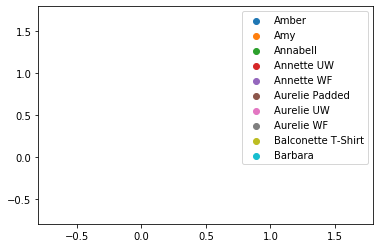

In [52]:
# Dimensionality Reduction using PCA (Principal Component Analysis) Here n_components = 2 means, transform into a 2-Dimensional dataset.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from cycler import cycler

pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print("explained variance ratio:", pca.explained_variance_ratio_)
print("Preserved Variance:", sum(pca.explained_variance_ratio_))

# Print scatter plot to view classification of the simplified dataset
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
target_names = ['Amber', 'Amy', 'Annabell', 'Annette UW', 'Annette WF',
       'Aurelie Padded', 'Aurelie UW', 'Aurelie WF', 'Balconette T-Shirt',
       'Barbara', 'Becky', 'Bella', 'Bianca UW', 'Bianca WF',
       'Cami T-Shirt', 'Comfy', 'Contour T-Shirt', 'Dana', 'Dianna',
       'Dorothy', 'Ella', 'Ellen', 'Embrace', 'FC Rose Contour',
       'Frances', 'Gracy', 'Greta', 'Helena', 'Ina', 'Isabel', 'Isadora',
       'Jasmin', 'Karla', 'Karolina Padded', 'Karolina UW', 'Katy',
       'Lace Enhancement', 'Lara', 'Lara Satin', 'Lily', 'Magdalena',
       'Magdalena Padded', 'Mara', 'Marie', 'Marlena', 'Massage', 'Mona',
       'Nancy', 'Nora', 'Performance', 'Petite Seamless',
       'Petite T-Shirt', 'Power', 'Regalia', 'Rita', 'Rose Contour',
       'Rose T-Back', 'Ruth', 'Soft Shape', 'Softee Cami, Lace',
       'Softee Cami, No lace', 'Softee Cami, Vee', 'Zipper Sports MDSP']

plt.figure()

target_list = np.array(y).flatten()
for t_name, c in zip(target_names, colors):
    plt.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

plt.legend()
plt.show()

In [53]:
class_label = pd.DataFrame(encoded_df.iloc[:,-1])
class_label.columns = ['label']
df = encoded_df.iloc[:, :-1]
df.head(n=10)

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
2,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
3,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
4,78,100,58.0,32,0,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0
5,77,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
6,78,100,60.0,32,0,4,0,5,1,0,...,0,0,0,1,0,0,2,1,0,1
7,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
8,78,100,58.0,32,0,1,1,5,1,0,...,0,1,1,0,0,0,0,0,0,0
9,78,100,58.0,32,0,1,1,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [54]:
df = df.sub(df.mean(axis=0), axis=1)

In [55]:
df_mat = np.asmatrix(df)
sigma = np.cov(df_mat.T)

In [56]:
eigVals, eigVec = np.linalg.eig(sigma)

In [57]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [58]:
eigVec = eigVec[:,:2]

In [59]:
transformed = df_mat.dot(eigVec)

In [60]:
#horizontally stack transformed data set with class label.
final_df = np.hstack((transformed, class_label))
#convert the numpy array to data frame
final_df = pd.DataFrame(final_df)
#define the column names
final_df.columns = ['x','y','label']

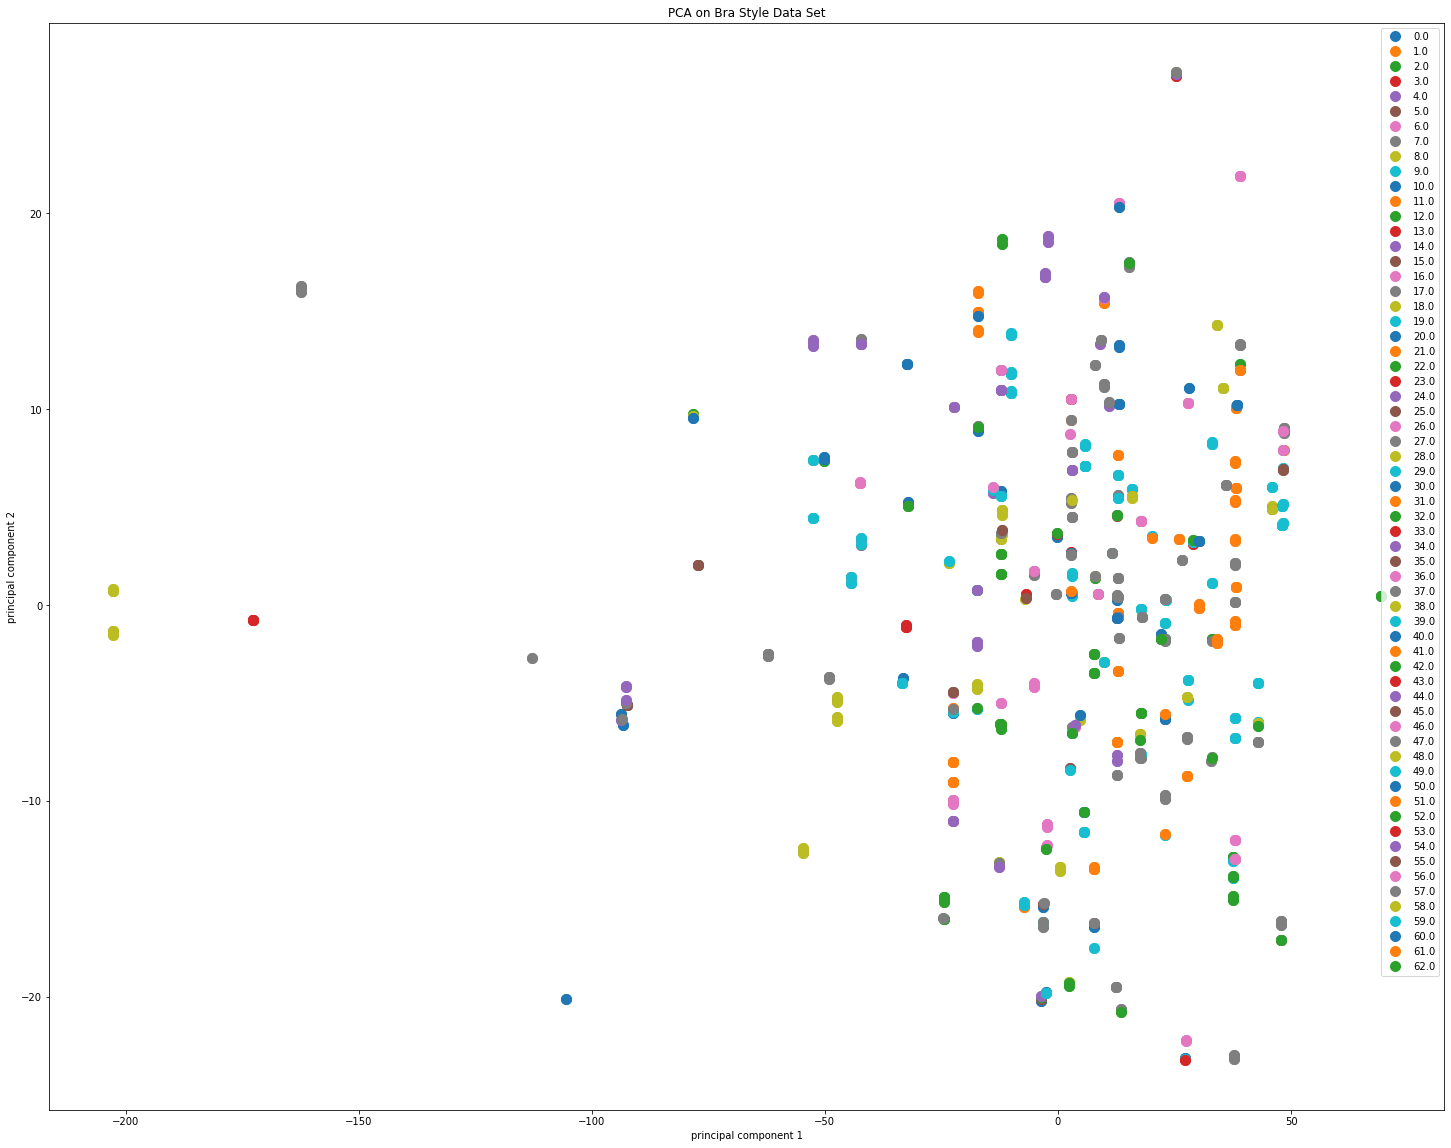

In [66]:
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name)
    axes.set_title("PCA on Bra Style Data Set")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 20)
#fig.savefig('test2png.png', dpi=100)

plt.show()

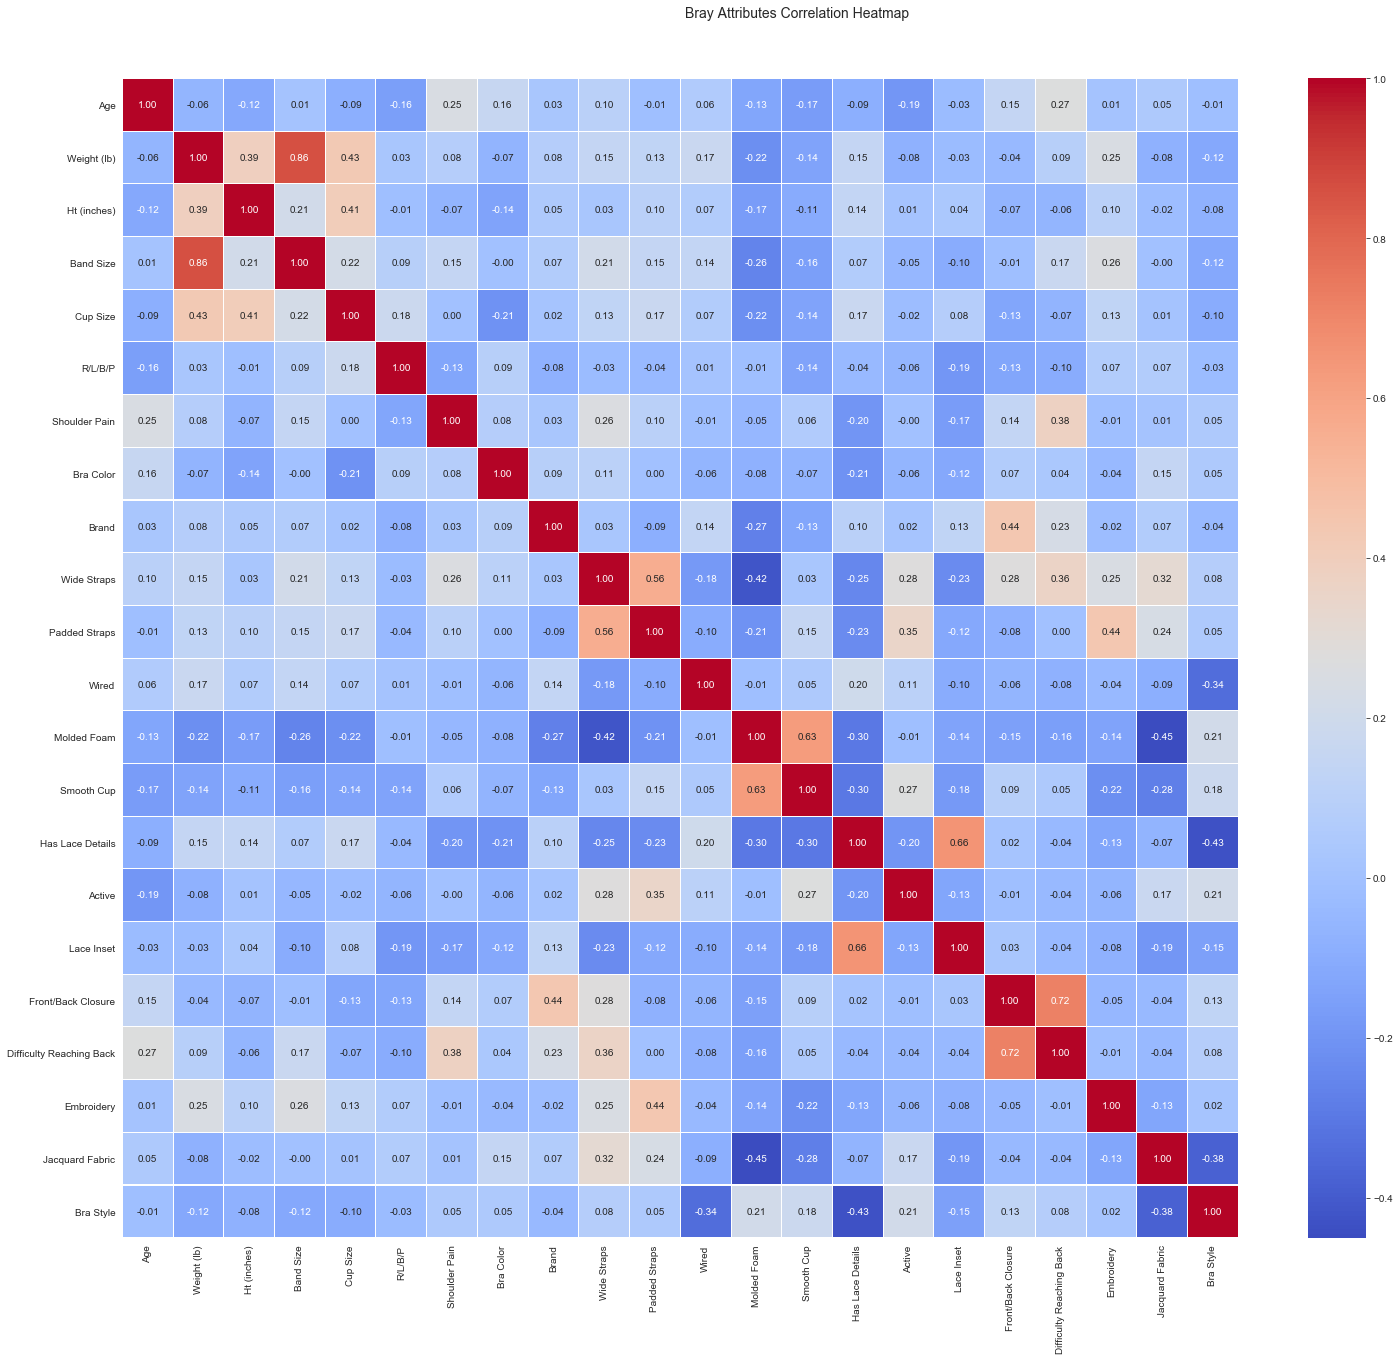

In [70]:
f, ax = plt.subplots(figsize=(10, 6))
corr = encoded_df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 20)
t= f.suptitle('Bray Attributes Correlation Heatmap', fontsize=14)

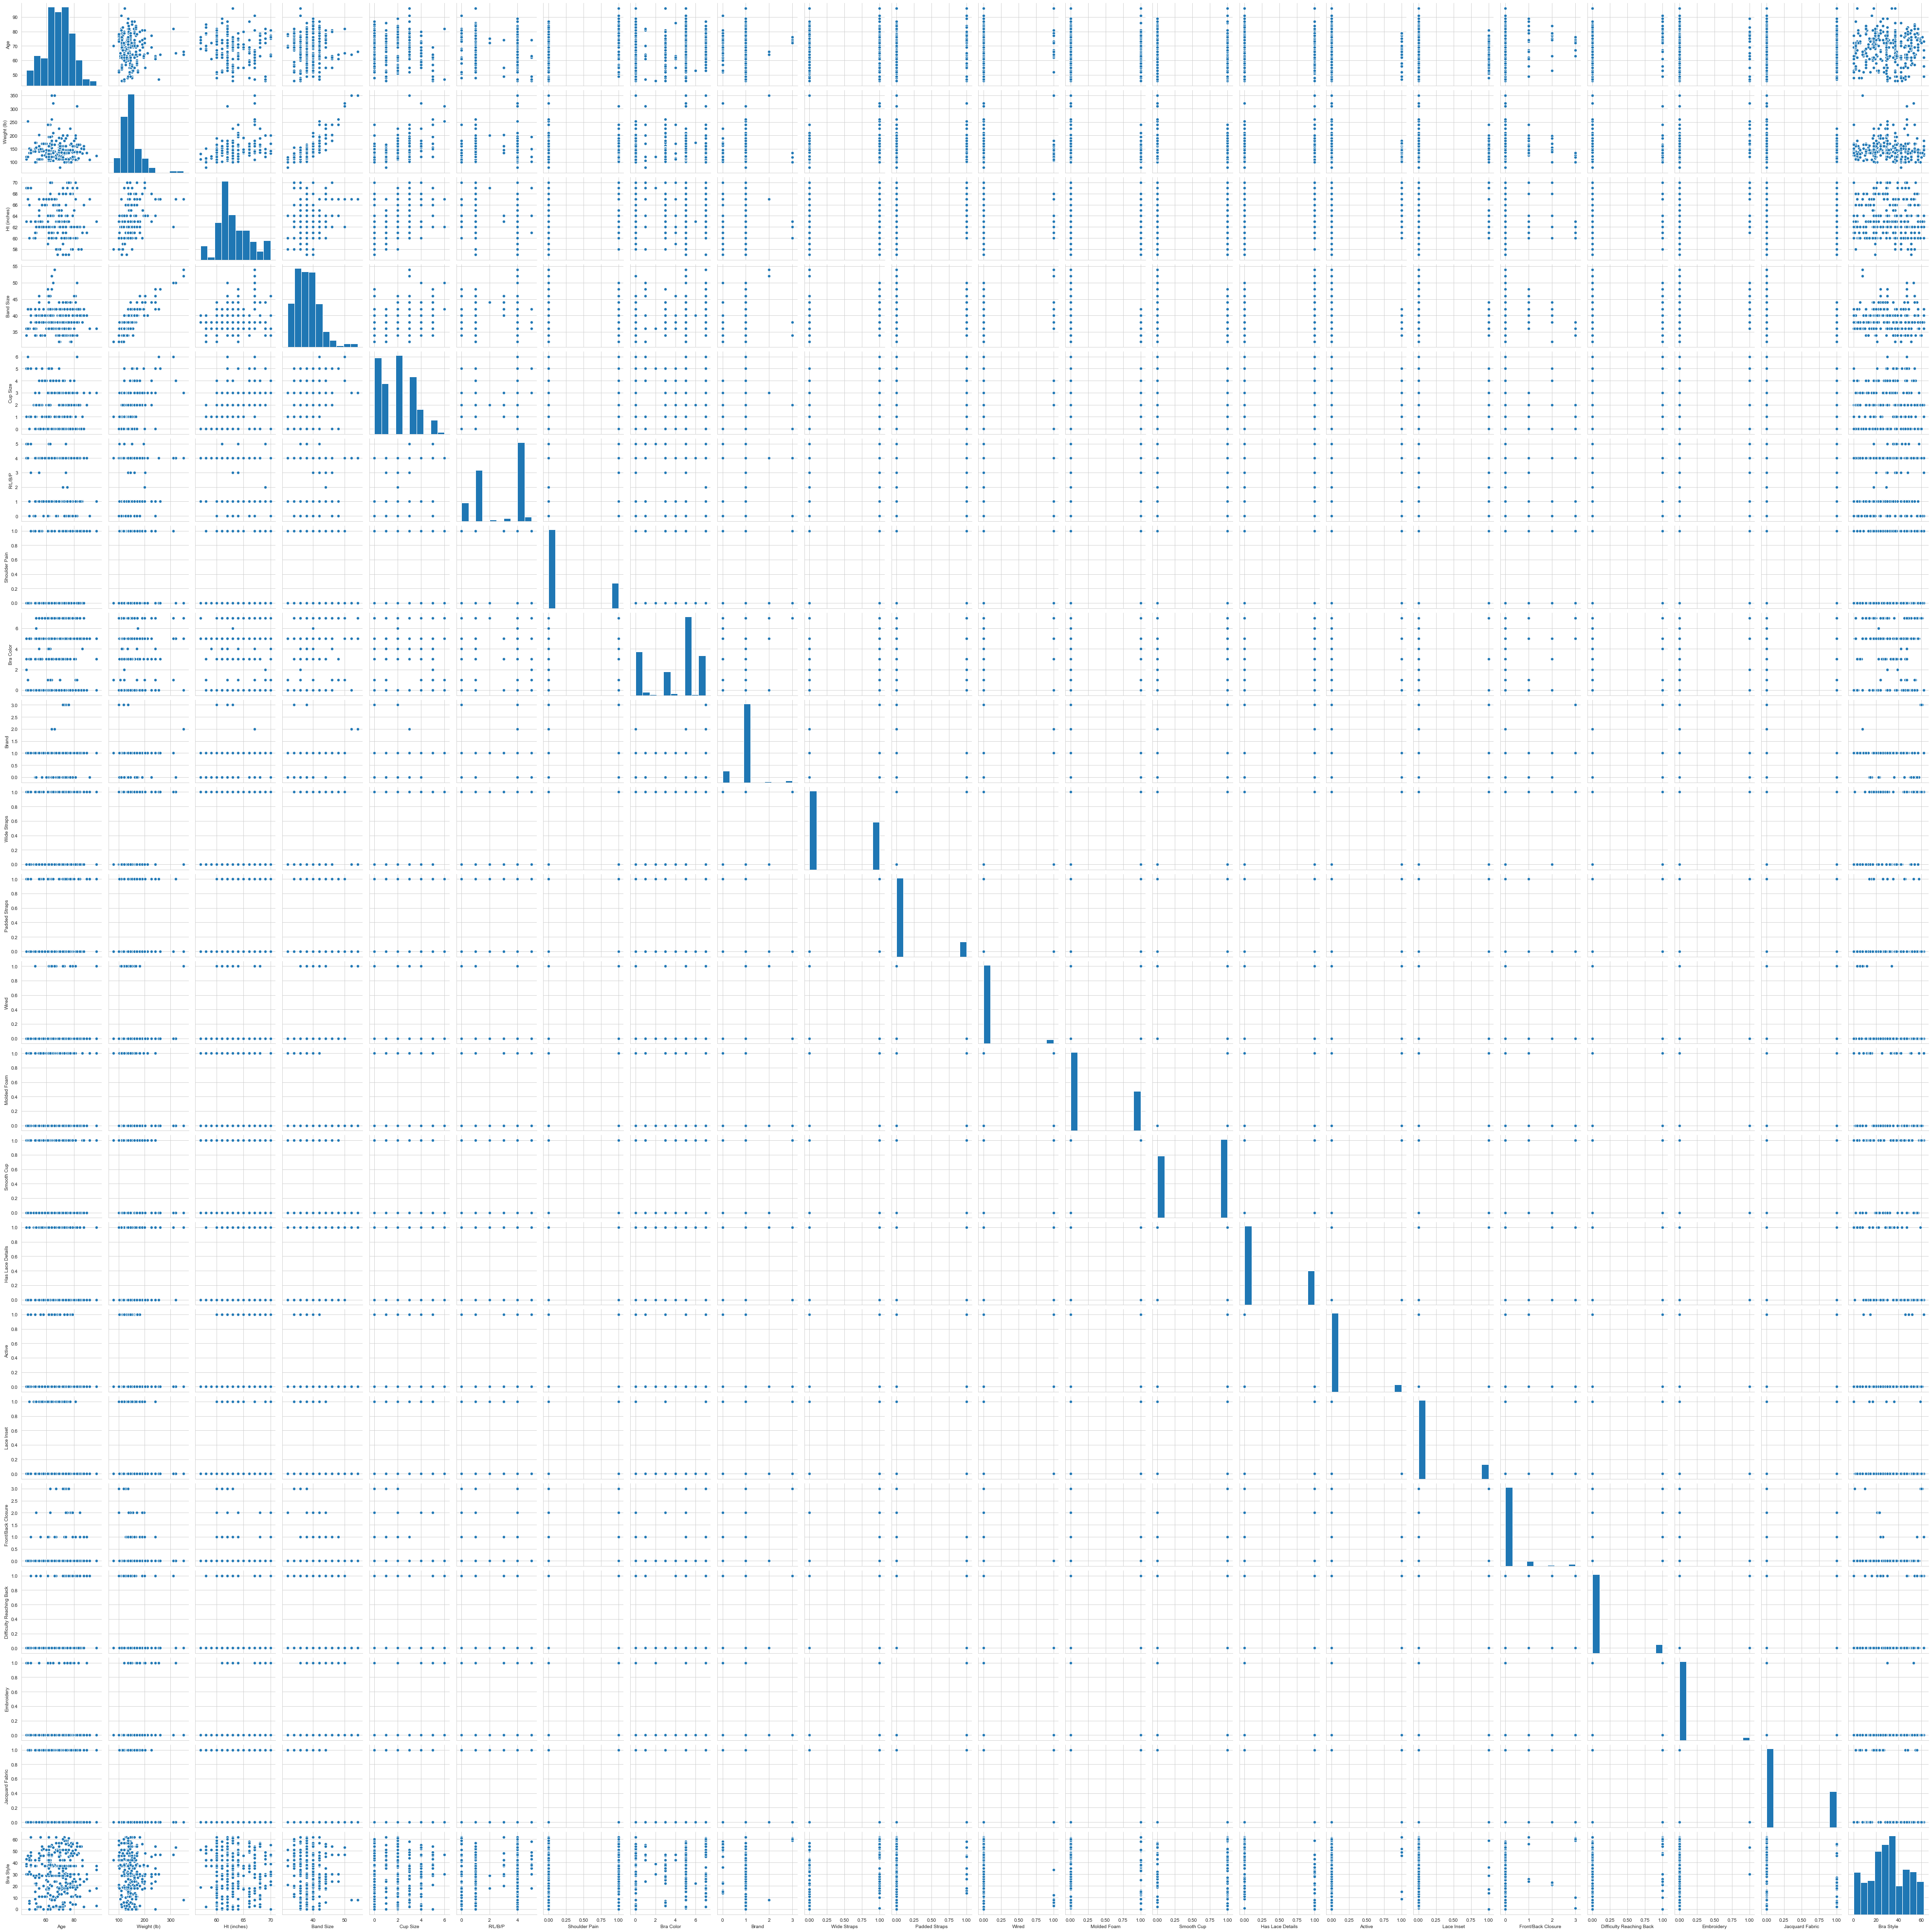

In [72]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(encoded_df)

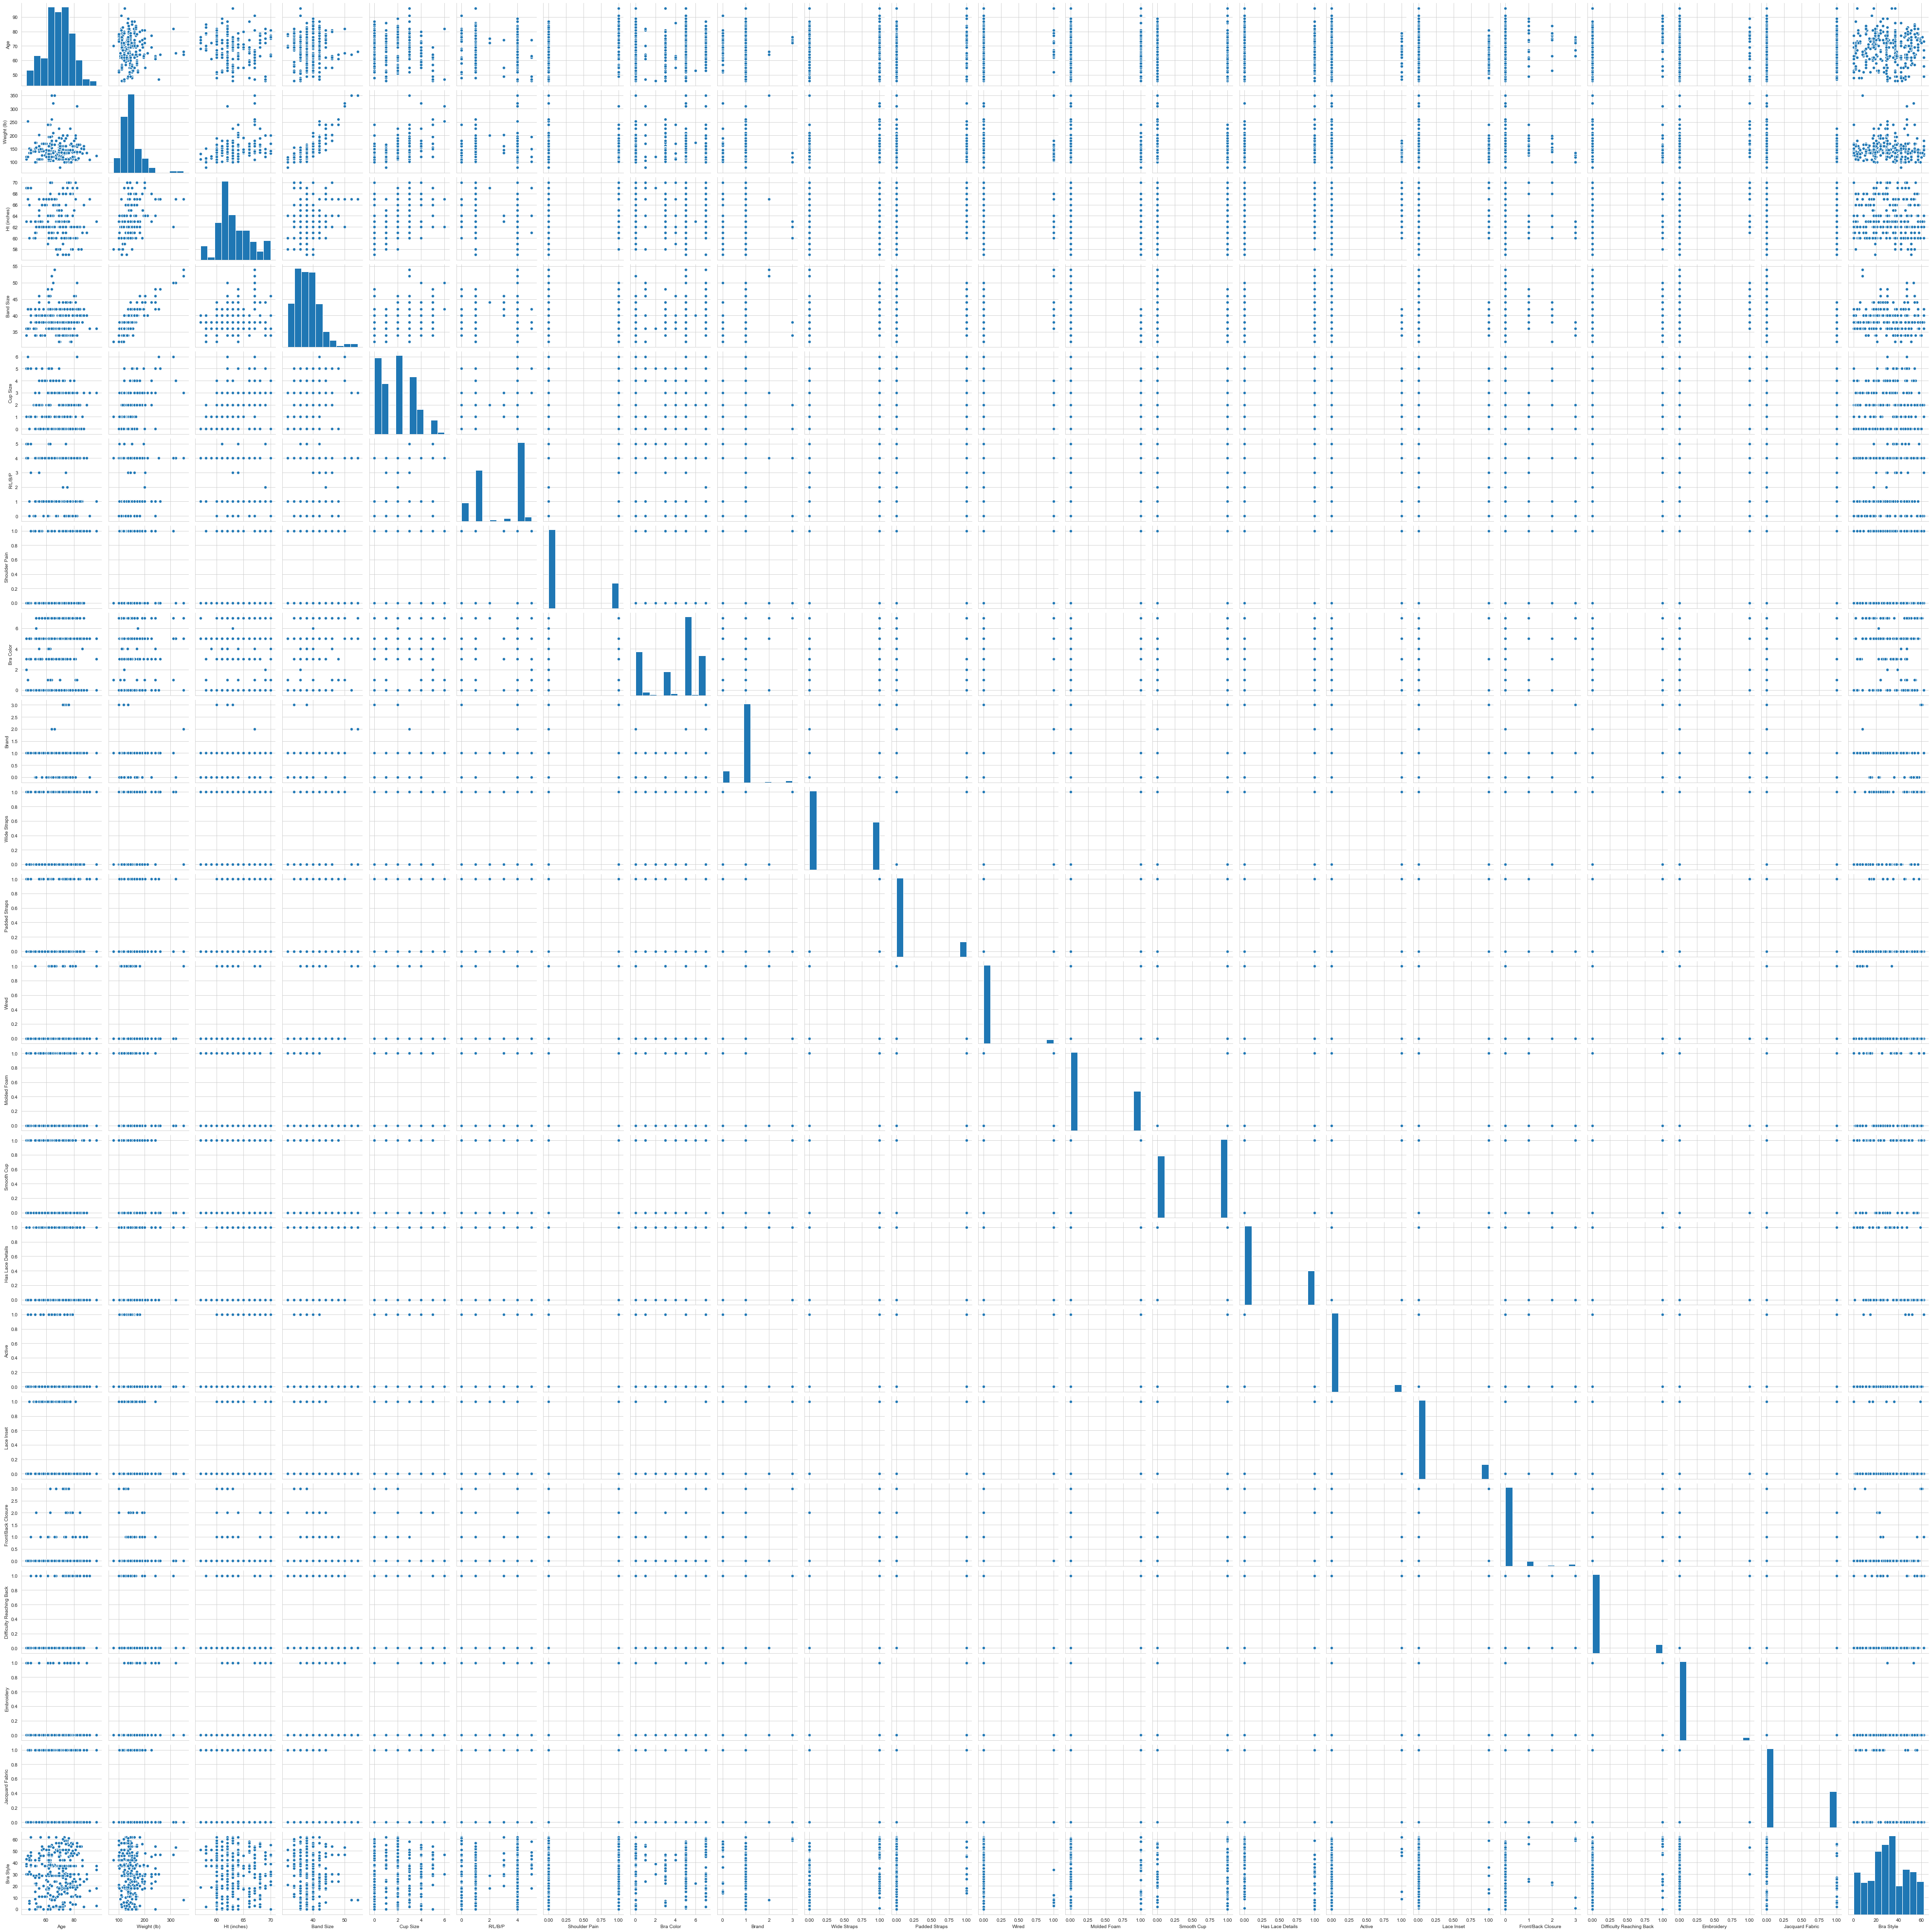

In [73]:
pair_plot = sns.pairplot(encoded_df)

AttributeError: 'PairGrid' object has no attribute 'save_fig'